<a href="https://colab.research.google.com/github/Shiveringapple/DeepLearing/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" 28*28 灰階圖片 flattern -> 784個輸入  
0到9的數字辨識
資料多 模型大 ,問題簡單 模型小
資料少 模型小 ,問題難 模型大

輸出多個：softmax
輸出一個：sigmoid
"""

' 28*28 灰階圖片 flattern -> 784個輸入  \n0到9的數字辨識\n資料多 模型大 ,問題簡單 模型小\n資料少 模型小 ,問題難 模型大\n\n輸出多個：softmax\n輸出一個：sigmoid\n'

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train),(x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


2


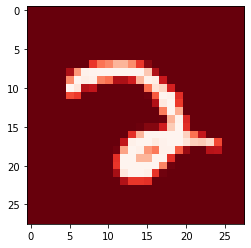

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 59999)
print(y_train[idx])
# cmap="gray"
plt.imshow(x_train[idx], cmap="Reds_r")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,91,136,151,187,187,156,92,17,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,38,164,250,253,254,254,254,254,254,254,203,41,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,153,254,244,248,147,133,41,38,69,188,249,242,62,0,0,0,0,0,0,0,0,0,0


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
layers = [
    # param = 784*128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # param = 128*10(連線個數) + 10(bias)(偏移) 或寫成 (128+1)*10 
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Loss: 跟正確答案的距離
# 如果用MSE 坡度會太小 不能用
# Entropy熵: 亂度，從微觀的角度，越穩的東西越亂
# Entropy = P1(log1-logP1) + P2(log1-logP2) = P1log1/P1 + P2log1/P2
# 交叉熵 = P1 * log(1/q1) + P2 * log(1/q2)
# 多個：Categorical CrossEntropy
# 一個：Binary CrossEntropy p * log(1/q) + (1-p) * log(1/1-q)

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
# 資料處理：y
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 資料處理：x
# -1是請電腦幫你算，實際上是上面shape的60000，限一個
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [ ]:
# batch：看幾筆在調整一次(20~200筆)
# epochs：整份訓練資料看幾遍(10 -> 60000*10)
# verbose: 0(quiet) 1(default) 2(necessary)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     validation_split=0.1,
     batch_size=200,
     epochs=100,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
270/270 - 1s - loss: 0.0228 - accuracy: 0.9944 - val_loss: 0.0716 - val_accuracy: 0.9805
Epoch 2/100
270/270 - 1s - loss: 0.0190 - accuracy: 0.9958 - val_loss: 0.0738 - val_accuracy: 0.9795
Epoch 3/100
270/270 - 1s - loss: 0.0160 - accuracy: 0.9966 - val_loss: 0.0786 - val_accuracy: 0.9792
Epoch 4/100
270/270 - 1s - loss: 0.0137 - accuracy: 0.9975 - val_loss: 0.0705 - val_accuracy: 0.9807
Epoch 5/100
270/270 - 1s - loss: 0.0118 - accuracy: 0.9980 - val_loss: 0.0766 - val_accuracy: 0.9812
Epoch 6/100
270/270 - 1s - loss: 0.0097 - accuracy: 0.9985 - val_loss: 0.0777 - val_accuracy: 0.9817
Epoch 7/100
270/270 - 1s - loss: 0.0079 - accuracy: 0.9990 - val_loss: 0.0718 - val_accuracy: 0.9833
Epoch 8/100
270/270 - 1s - loss: 0.0072 - accuracy: 0.9991 - val_loss: 0.0771 - val_accuracy: 0.9810
Epoch 9/100
270/270 - 1s - loss: 0.0065 - accuracy: 0.9992 - val_loss: 0.0784 - val_accuracy: 0.9813


In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9798


[0.07514430582523346, 0.9797999858856201]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(i) for i in range(10)],
      index=["{}(真實)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),973,1,0,1,0,0,1,1,3,0
1(真實),0,1125,3,1,0,1,2,1,2,0
2(真實),6,4,1002,3,1,0,3,4,8,1
3(真實),0,0,5,990,0,5,0,3,4,3
4(真實),2,0,2,1,960,0,5,3,2,7
5(真實),3,0,0,5,1,872,4,1,5,1
6(真實),6,2,0,1,3,5,939,1,1,0
7(真實),1,3,5,4,0,0,0,1008,1,6
8(真實),3,0,4,4,3,5,1,3,946,5
9(真實),1,3,0,5,6,5,1,4,1,983


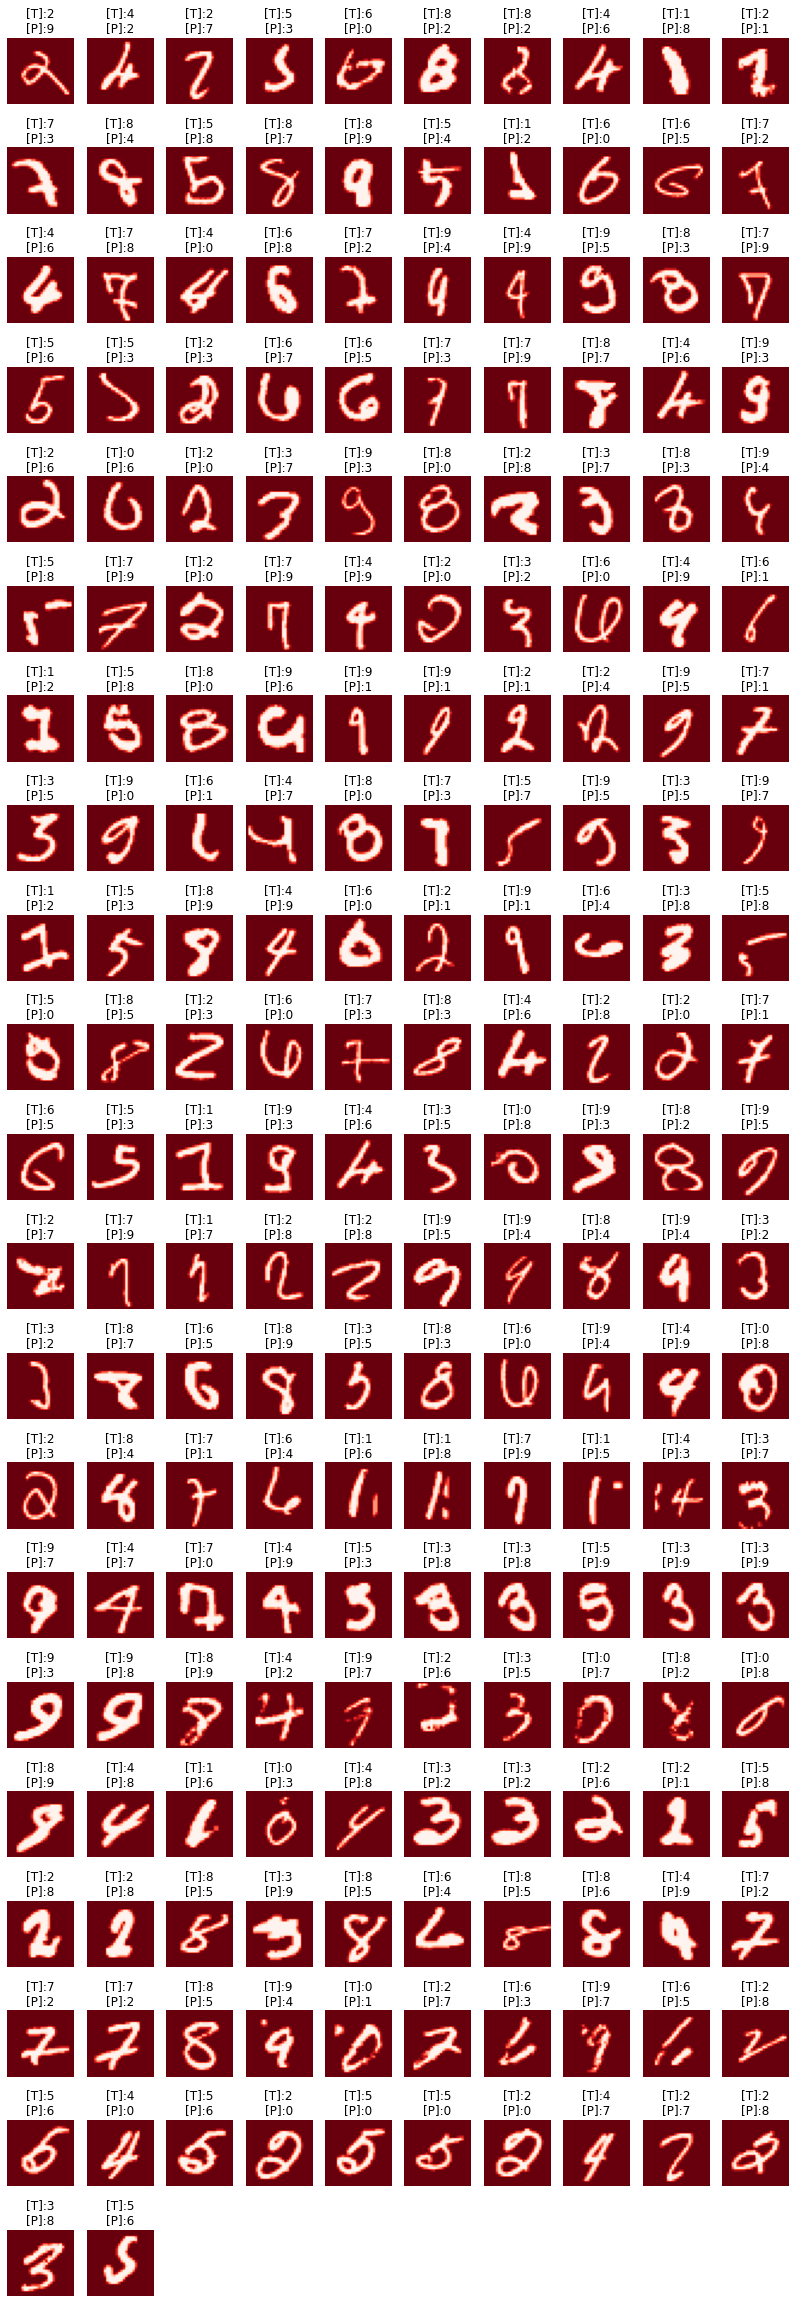

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
img, label, pred = x_test[idx], y_test[idx], pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(img) // width + 1
for i in range(len(img)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(label[i], pred[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img[i], cmap="Reds_r")

檔名:test.png
答案: 7
0 的機率: 0.0
1 的機率: 0.096
2 的機率: 0.184
3 的機率: 0.001
4 的機率: 0.0
5 的機率: 0.0
6 的機率: 0.0
7 的機率: 0.713
8 的機率: 0.006
9 的機率: 0.0


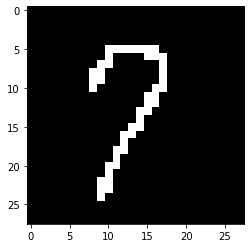

In [ ]:
# https://pillow.readthedocs.io/en/5.1.x/handbook/concepts.html#concept-modes
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_norm = np.array(img).reshape(1, 784) / 255
ans = model.predict_classes(img_norm)
print("答案:", ans[0])
prob = model.predict(img_norm)[0]
for i, p in enumerate(prob):
    print(i, "的機率:", round(p, 3))
plt.imshow(img, cmap="gray")

In [ ]:
# model.save("1234.h5")
# !不用再compile
from tensorflow.keras.models import load_model
load = load_model("mlp.h5")
load.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9798


[0.07514430582523346, 0.9797999858856201]

In [ ]:
import os
if not os.path.exists("drive/My Drive/mlp.h5"):
  # create mode
  pass
else:
  print("Loading...")
  model = load_model("drive/My Drive/mlp.h5")
#fit